# Rescale optical depth and compute 1D power spectrum

In [15]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import sys
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 120
mpl.rcParams['figure.dpi'] = 120
import extract_skewers
import read_gadget
import fake_spectra.griddedspectra as grid_spec
import snapshot_admin
import measure_flux_power as powF

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Read skewers for a single snapshot, looking at different temperatures 

In [16]:
basedir='/Users/font/CosmoData/test_sim_emulator/test_march_2019/'
skewers_dir=basedir+'/output/skewers/'
test_snap_num=8
n_skewers=10
width_Mpc=0.1

In [17]:
# read file containing information of all temperature rescalings
snap_filename=skewers_dir+'/'+extract_skewers.get_snapshot_json_filename(test_snap_num,n_skewers,width_Mpc)
# create an object that will deal with all skewers in the snapshot
snapshot=snapshot_admin.SnapshotAdmin(snap_filename)
Nsk=len(snapshot.data['sk_files'])
print(Nsk)

3


In [18]:
# loop over all temperature models in snapshot
for isk in range(Nsk):
    sk_file=snapshot.data['sk_files'][isk]
    print(sk_file)
    # read skewers from HDF5 file
    skewers=grid_spec.GriddedSpectra(test_snap_num, basedir+'/output/', 
                                         savedir=skewers_dir, savefile=sk_file, reload_file=False)
    # compute fiducial mean flux (and compare to stored values)
    mf_ini=skewers.get_mean_flux()
    print(mf_ini,snapshot.data['sim_mf'][isk])

skewers_8_Ns10_wM0.1_sT0.8_sg1.0.hdf5
100  sightlines. resolution:  8.06712167091  z= 3.500000045
0.458512674903 0.4585126749034992
skewers_8_Ns10_wM0.1_sT1.0_sg1.0.hdf5
100  sightlines. resolution:  8.06712167091  z= 3.500000045
0.455109683771 0.45510968377146144
skewers_8_Ns10_wM0.1_sT1.2_sg1.0.hdf5
100  sightlines. resolution:  8.06712167091  z= 3.500000045
0.452127613689 0.4521276136893732


In [19]:
# loop over all temperature models in snapshot, rescale with different values of scale_tau
scales_tau=[0.8,0.9,1.0,1.1,1.2]
print('scales_tau',scales_tau)
for isk in range(Nsk):
    sk_file=snapshot.data['sk_files'][isk]
    print(sk_file)
    # read skewers from HDF5 file
    skewers=grid_spec.GriddedSpectra(test_snap_num, basedir+'/output/', 
                                         savedir=skewers_dir, savefile=sk_file, reload_file=False)
    # compute fiducial mean flux (and compare to stored values)
    mf_ini=skewers.get_mean_flux()
    # loop over tau scalings
    for scale_tau in scales_tau:
        F=powF.get_transmitted_flux_fraction(skewers,scale_tau)
        print(scale_tau,', <F> =',np.mean(F))

scales_tau [0.8, 0.9, 1.0, 1.1, 1.2]
skewers_8_Ns10_wM0.1_sT0.8_sg1.0.hdf5
100  sightlines. resolution:  8.06712167091  z= 3.500000045
0.8 , <F> = 0.508568239097
0.9 , <F> = 0.482230125651
1.0 , <F> = 0.458512674903
1.1 , <F> = 0.437009756891
1.2 , <F> = 0.417401614497
skewers_8_Ns10_wM0.1_sT1.0_sg1.0.hdf5
100  sightlines. resolution:  8.06712167091  z= 3.500000045
0.8 , <F> = 0.505362940547
0.9 , <F> = 0.478917516099
1.0 , <F> = 0.455109683771
1.1 , <F> = 0.433530458639
1.2 , <F> = 0.413857843399
skewers_8_Ns10_wM0.1_sT1.2_sg1.0.hdf5
100  sightlines. resolution:  8.06712167091  z= 3.500000045
0.8 , <F> = 0.502527431781
0.9 , <F> = 0.476002007006
1.0 , <F> = 0.452127613689
1.1 , <F> = 0.430492746128
1.2 , <F> = 0.410773528538


In [21]:
# loop over all temperature models in snapshot
list_k=[]
list_p1d=[]
list_mF=[]
for isk in range(Nsk):
    sk_file=snapshot.data['sk_files'][isk]
    print(sk_file)

    # read skewers from HDF5 file
    skewers=grid_spec.GriddedSpectra(test_snap_num, basedir+'/output/', 
                                     savedir=skewers_dir, savefile=sk_file, reload_file=False)

    # loop over tau scalings
    for scale_tau in scales_tau:  
        k,p1d,mF=powF.measure_F_p1D_Mpc(skewers,scale_tau,L_Mpc=100.0)
        list_mF.append(mF)
        list_k.append(k)
        list_p1d.append(p1d)

skewers_8_Ns10_wM0.1_sT0.8_sg1.0.hdf5
100  sightlines. resolution:  8.06712167091  z= 3.500000045
skewers_8_Ns10_wM0.1_sT1.0_sg1.0.hdf5
100  sightlines. resolution:  8.06712167091  z= 3.500000045
skewers_8_Ns10_wM0.1_sT1.2_sg1.0.hdf5
100  sightlines. resolution:  8.06712167091  z= 3.500000045


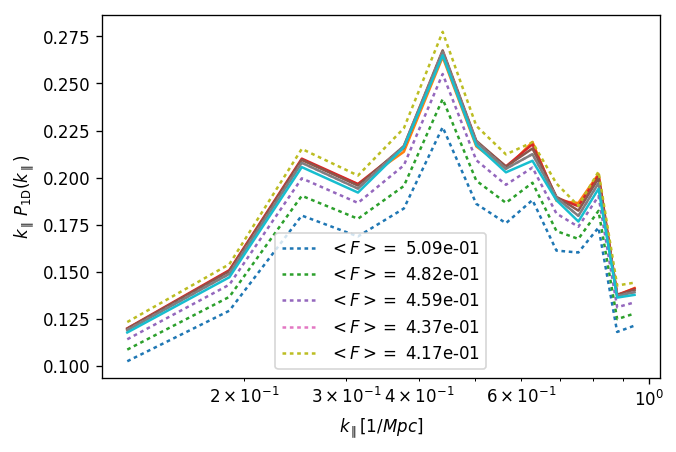

In [33]:
plt.figure()
k_Mpc=list_k[0]
kmin_Mpc=k_Mpc[1]
kmax_Mpc=1.0
mask=(k_Mpc>kmin_Mpc) & (k_Mpc<kmax_Mpc)
for isk in range(5):
    #T0=snapshot.data['sim_T0'][isk]
    #plt.semilogx(k_kms,list_p1d[isk],label=r'$T_0 = %e \, K$'%T0)
    plt.semilogx(k_Mpc[mask],k_Mpc[mask]*list_p1d[isk][mask]/list_mF[isk],label=r'$<F> =$ %.2e'% list_mF[isk],ls=':')
    plt.semilogx(k_Mpc[mask],k_Mpc[mask]*list_p1d[isk][mask]/list_mF[3])
plt.legend()
plt.xlabel(r'$k_\parallel [1/Mpc]$')
plt.ylabel(r'$k_\parallel \, P_{\rm 1D}(k_\parallel)$');

In [23]:
list_mF

[0.5085682390970464,
 0.48223012565132173,
 0.45851267490349917,
 0.43700975689093308,
 0.41740161449732682,
 0.50536294054722086,
 0.47891751609856403,
 0.45510968377146144,
 0.43353045863867068,
 0.41385784339885839,
 0.50252743178061554,
 0.47600200700589429,
 0.45212761368937321,
 0.4304927461283628,
 0.41077352853767213]